- IQR 계산하기
    
$$
x = [x_1, x_2, x_3, x_4 … x_i , x_{i+g}, x_n]
$$``

- $q_1 = 0.25$, $q_2 = 0.5$,$q_3 = 0.75$ 이고 여기서  $n$ = 데이터의 총 개수
    
$$
i + g = q(n - \alpha - \beta + 1) + \alpha
$$

- 선형일때의 $\alpha=1, \beta=1$ 이다.
    
$$
i+g = q(n - 1) + 1
$$
    
또한 $IQR = Q_3 - Q_1$

- ex) 만약 $x = [1, 2, 4, 6, 8, 12,13,15,26,37,69,85]$ 일 때


- $q_1 = 0.25$ 
    - $i+g = 0.25 ( 12 - 1 ) + 1$
    - $i+g = 3.75$ =  $3 + 0.75$
    - 선형 보간 시 ⇒ $Q_1 =4 + (6 - 4) *0.75 = 5.5$
- $q_2 = 0.5$
    - $i+g = 0.5 ( 12 - 1 ) + 1$
    - $i+g = 6.5$ =  $6 + 0.5$
    - 선형 보간 시 ⇒ $Q_2 = 12 + (13 - 12) * 0.5 = 12.5$
- $q_3 = 0.75$
    - $i+g = 0.75 ( 12 - 1 ) + 1$
    - $i+g = 9.25$ = $9+ 0.25$
    - 선형 보간 시 ⇒ $Q_3 = 26 + (37 - 26) * 0.25 = 28.75$
- $IQR = 23.25$
    - 최소 허용치 = $Q_1 - 1.5 \times IQR = 5.5 - 1.5 \times 23.75 = -29.375$
    - 최대 허용치 =  $Q_3 + 1.5 \times IQR = 28.75 + 1.5 \times 23.75 = 64.375$

```text
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                  |-----:-----|
  o      |--------|     :     |--------|    o  o
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```

1. 수염의 길이는 데이터의 범위 안에서 정해진다.
2. q_1 - IQR 보다 큰 가장 가까운 데이터 안의 값으로 최저 한계선이 정해진다.
3. q_3 + IQR 보다 작안 가장 가까운 데이터 안의 값으로 최대 한계선이 정해진다.
    - (min / max value if there are no outliers)

[0.01 0.05 0.07 0.53 0.6  0.83 1.51 1.79 2.83 4.17]


array([0.05, 4.17, 1.79, 0.53, 0.07, 0.01, 1.51, 2.83, 0.6 , 0.83])

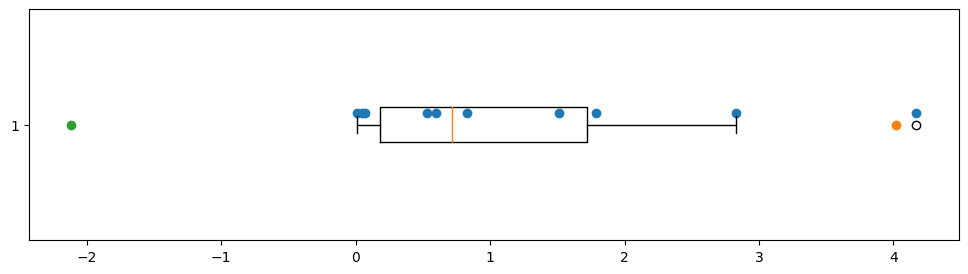

In [223]:
import matplotlib.pyplot as plt
import numpy as np

def boxplot_checking(x):
    x = np.sort(x)
    print(x)
    q_1 = np.quantile(x, 0.25) 
    q_2 = np.quantile(x, 0.50) 
    q_3 = np.quantile(x, 0.75) 

    iqr = q_3 - q_1
    min_, max_  = (q_1 - 1.5 * iqr, q_3 + 1.5 * iqr)

    fig, ax = plt.subplots(1,1, figsize=(12, 3))

    ax.boxplot(x, vert=False, whis=1.5 );
    ax.scatter([x],[1.05]*len(x))
# plt.scatter([seven_num_sum],[1.1]*len(seven_num_sum))
    ax.scatter([max_],[1])
    ax.scatter([min_],[1])


x = np.round(np.abs(np.random.randn(10) ** 2),2)
boxplot_checking(x)
x

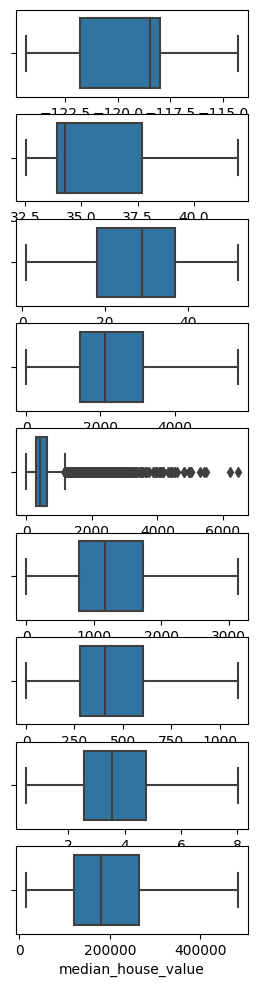

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# CSV 파일 불러오기
url = 'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv'
df = pd.read_csv(url)

def weirdo_check(df, col):
    q1 = np.quantile(df[col], 0.25)
    q3 = np.quantile(df[col], 0.75)
    iqr = q3 - q1

    # 이상치 확인
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 이상치 보정
    df.loc[df[col] < lower_bound, col] = lower_bound
    df.loc[df[col] > upper_bound, col] = upper_bound
    return df[col]

num_cols = df.describe().columns
fig, ax = plt.subplots(len(num_cols), 1, figsize=(3, 12))

for col in num_cols:
    df[col] = weirdo_check(df, col)

for i in range(len(num_cols)):
    sns.boxplot(x=df[num_cols[i]], ax=ax[i],)
